In [ ]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np


# Download and load the image and ground truth data
img_data = sio.loadmat('/content/Indian_pines.mat')
gt_data = sio.loadmat('/content/Indian_pines_gt.mat')

gt_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'indian_pines_gt'])

In [ ]:
# Extract the relevant arrays from the loaded data
img = img_data['indian_pines']
gt = gt_data['indian_pines_gt']

In [ ]:
from sklearn.decomposition import PCA
num_pixels = img.shape[0] * img.shape[1]
num_bands = img.shape[2]
nsamples, nx, ny = img.shape
reshaped_image = img.reshape((nsamples*nx, ny))

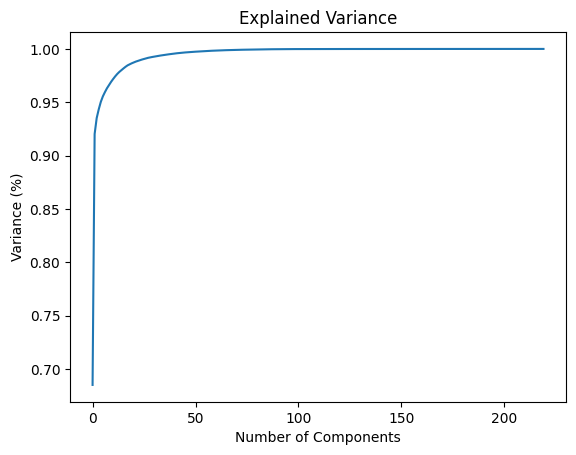

In [ ]:
X=reshaped_image

# Assuming X is your data
pca = PCA().fit(X)

# Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')  # for each component
plt.title('Explained Variance')
plt.show()


In [ ]:
num_components = 16  # Set the number of components
pca = PCA(n_components=num_components)
reduced_data = pca.fit_transform(reshaped_image)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(reduced_data)

In [ ]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=16)  # Adjust n_components as needed
ica_result = ica.fit_transform(normalized_data)



/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [ ]:
from sklearn.cluster import KMeans
n_clusters = 16  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters)
clusters = kmeans.fit_predict(ica_result)
clustered_image = clusters.reshape(nsamples, nx)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


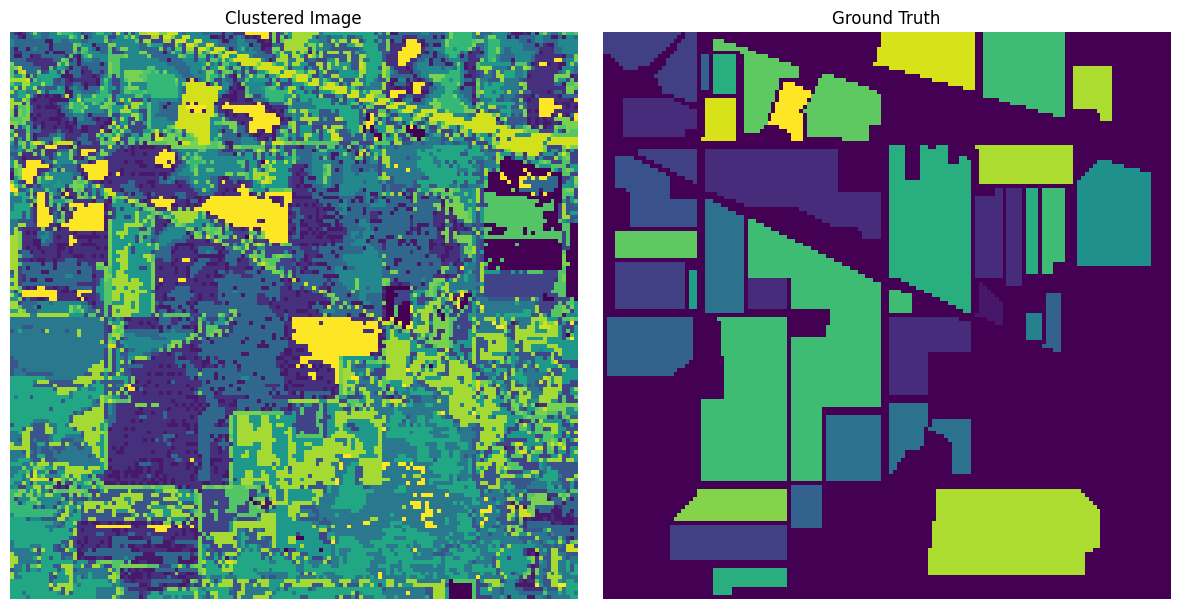

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Displaying the clustered image
axes[0].imshow(clustered_image, cmap='viridis')
axes[0].set_title('Clustered Image')
axes[0].axis('off')

# Displaying the ground truth
axes[1].imshow(gt, cmap='viridis')
axes[1].set_title('Ground Truth')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
clusters1 = hierarchical.fit_predict(ica_result)
clustered_image = clusters1.reshape(nsamples, nx)


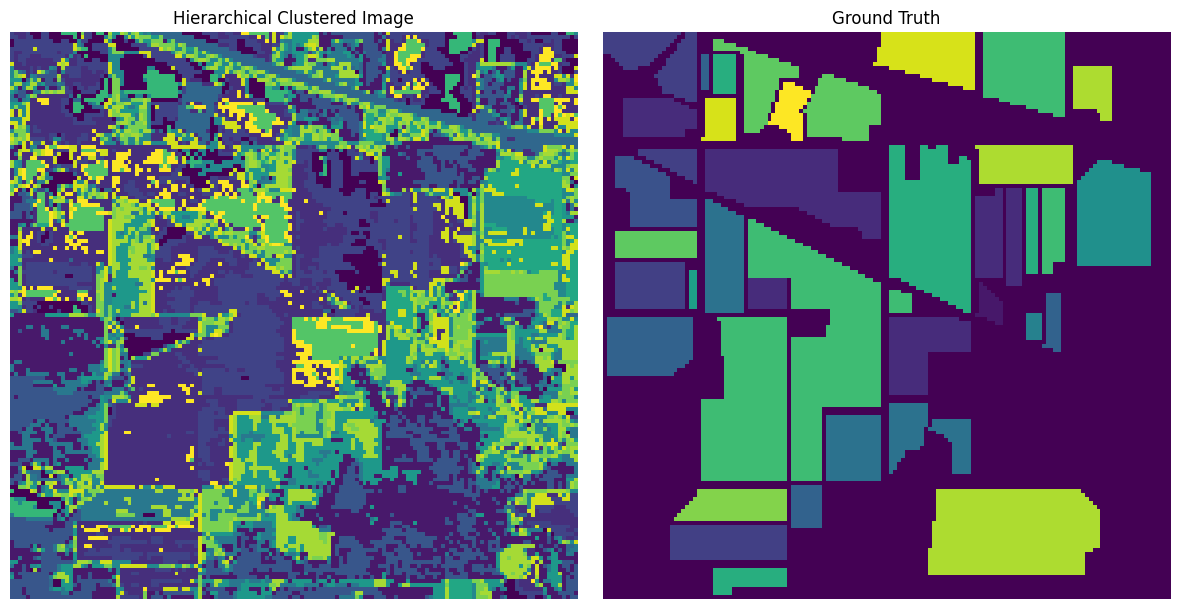

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Displaying the clustered image
axes[0].imshow(clustered_image, cmap='viridis')
axes[0].set_title('Hierarchical Clustered Image')
axes[0].axis('off')

# Displaying the ground truth
axes[1].imshow(gt, cmap='viridis')
axes[1].set_title('Ground Truth')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.022, min_samples=45, metric= 'manhattan')
clusters2 = dbscan.fit_predict(ica_result)
clustered_image1 = clusters.reshape(nsamples, nx)


(-0.5, 144.5, 144.5, -0.5)

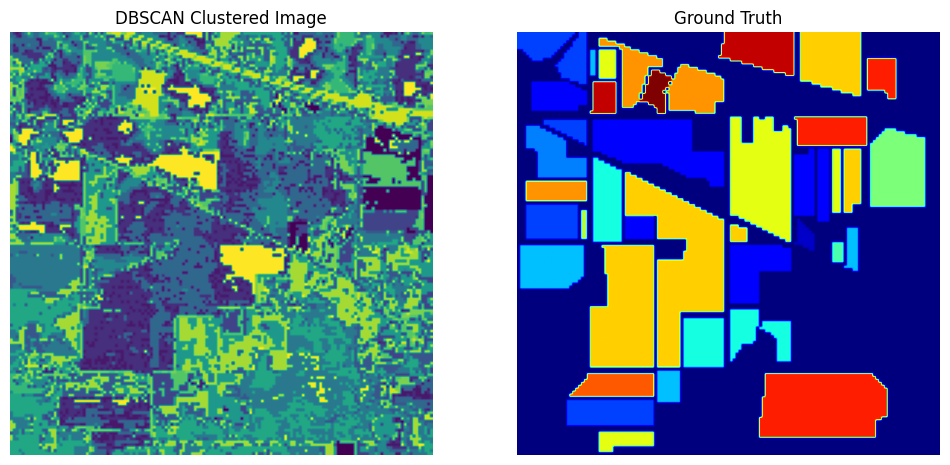

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Displaying the clustered image
axes[0].imshow(clustered_image1, cmap='viridis')
axes[0].set_title('DBSCAN Clustered Image')
axes[0].axis('off')

# Displaying the ground truth
axes[1].imshow(gt, cmap='jet')
axes[1].set_title('Ground Truth')
axes[1].axis('off')

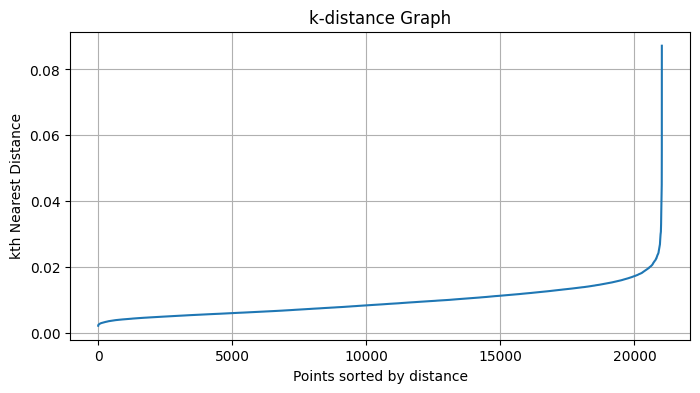

In [ ]:
from sklearn.neighbors import NearestNeighbors
X = ica_result
k = 16  # Number of nearest neighbors, can be adjusted
nearest_neighbors = NearestNeighbors(n_neighbors=k)
nearest_neighbors.fit(X)
distances, indices = nearest_neighbors.kneighbors(X)
distances = np.sort(distances[:, k-1], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title('k-distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('kth Nearest Distance')
plt.grid(True)
plt.show()

# Parameter exploration for DBSCAN
# After observing the k-distance plot, choose a range of 'eps' values to experiment with


In [ ]:
eps_values = [0.022]  # Adjust these based on the k-distance plot
min_samples_values = [45, 46]    # Different min_samples to try

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples, metric='manhattan').fit(X)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters and noise points
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        print(f'eps: {eps}, min_samples: {min_samples}, clusters: {n_clusters}, noise: {n_noise}')

eps: 0.022, min_samples: 45, clusters: 16, noise: 13495
eps: 0.022, min_samples: 46, clusters: 17, noise: 13523


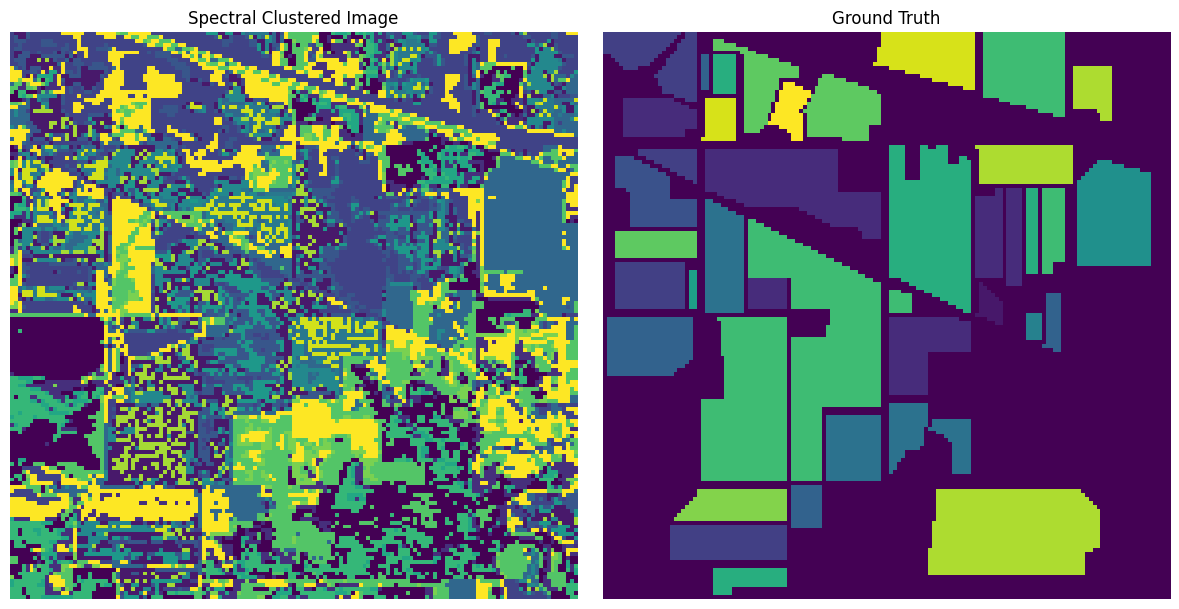

In [ ]:
from sklearn.cluster import SpectralClustering
n_clusters = 16  # Adjust this based on your needs
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', n_neighbors=16)
clusters = spectral_clustering.fit_predict(ica_result)

# Reshape the cluster labels back to the original image shape
clustered_image = clusters.reshape(nsamples, nx)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


axes[0].imshow(clustered_image, cmap='viridis')
axes[0].set_title('Spectral Clustered Image')
axes[0].axis('off')


axes[1].imshow(gt, cmap='viridis')
axes[1].set_title('Ground Truth')
axes[1].axis('off')

plt.tight_layout()
plt.show()